In [2]:
import requests
from IPython.display import display
from PIL import Image
import io

In [8]:
layers_name = ['Mapa_Base', 'Sentinel-2A', 'Ortofoto_2020', 'Ortofoto_2021']

layers = {
    'Mapa_Base': 'mapaBase_orto',
    'Sentinel-2A': 'IDENA:COPERN_Ras_S2A_140418',
    'Ortofoto_2020': 'IDENA:ortofoto_5000_2020',
    'Ortofoto_2021': 'IDENA:ortofoto_5000_2021'
}

In [19]:

url = """https://idena.navarra.es/ogc/wms"""

for layer_name in layers_name:
    parameters = {
        'service': 'WMS',
        'version': '2.0.0',
        'LAYERS': layers[layer_name],
        'CRS': 'EPSG:4326',
        'request': 'getMap',
        'format': 'image/png',
        'BBOX': '-1.61,42.05,-1.58,42.07',
        'WIDTH': '400',
        'HEIGHT': '400'
    }

    response = requests.get(url, params=parameters, stream=True)
    file = open("images/"+ layer_name + ".png", "wb")
    file.write(response.content)
    file.close()


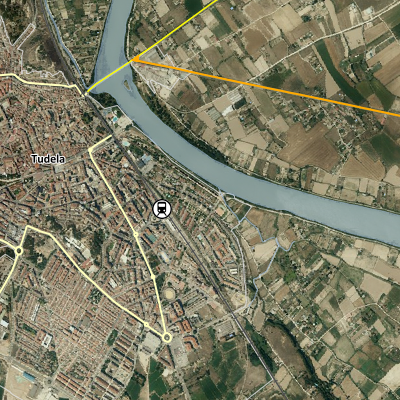

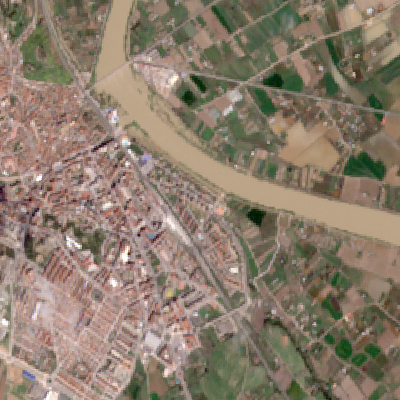

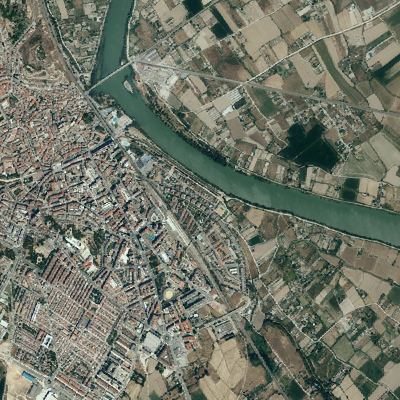

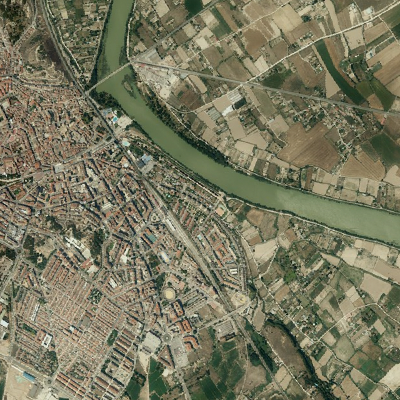

In [5]:
for layer_name in layers_name: 
    im = Image.open("images/"+ layer_name + ".png") 
    display(im)

In [5]:
url = """https://idena.navarra.es/ogc/wms"""

parameters = {
    'service': 'WMS',
    'version': '2.0.0',
    'LAYERS': 'IDENA:HIDROG_Pol_RioPrincipal',
    'CRS': 'EPSG:4326',
    'request': 'getMap',
    'format': 'image/png',
    'BBOX': '-1.61,42.05,-1.58,42.07',
    'WIDTH': '400',
    'HEIGHT': '400'
}

response = requests.get(url, params=parameters, stream=True)

img_river = Image.open(io.BytesIO(response.content))


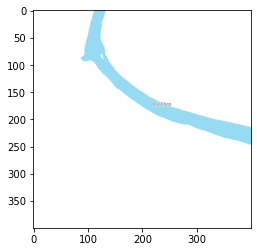

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for layer_name in [layers_name[0]]: 
    im = Image.open("images/"+ layer_name + ".png") 
    ax.imshow(im)
    ax.imshow(img_river)